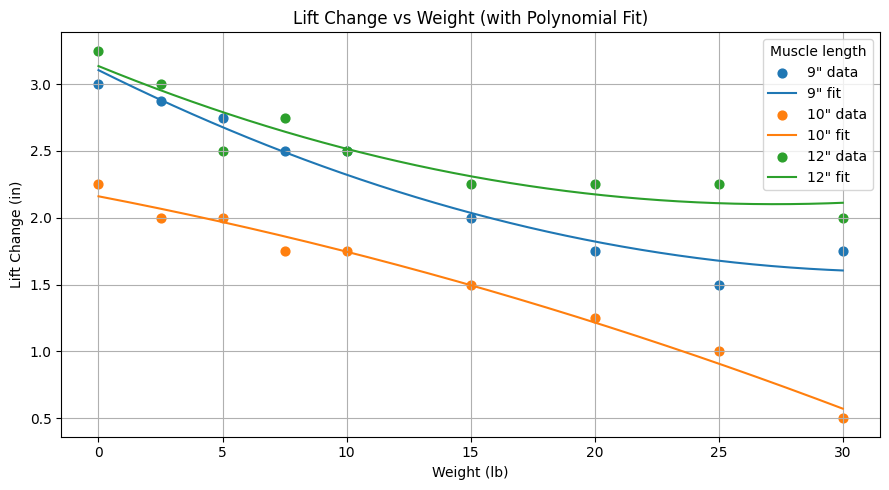

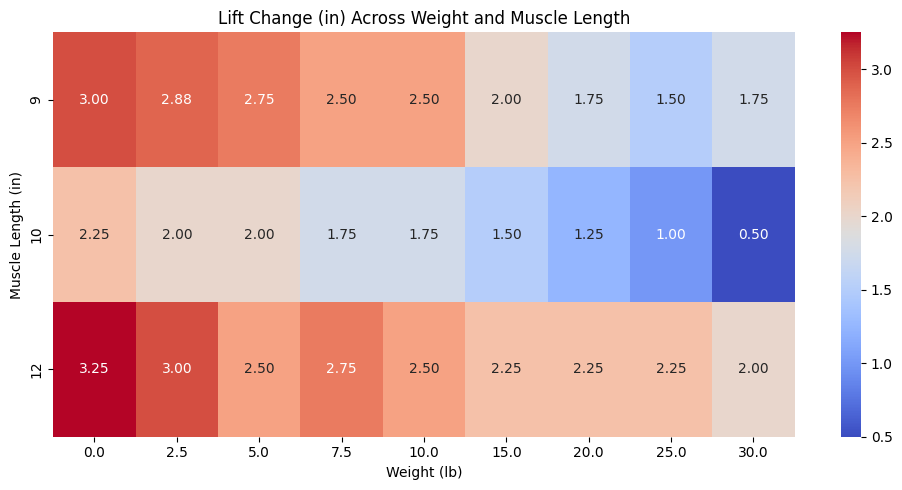

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# test with 3/4 inch sleeve diameter
# !!!starting height not adjusted to each measurement!!!
# muscle length in inches; 0psi lift from ground in inches; weight in pounds; weight lift distance in inches from ground
data = [
    # -- 9 inch tube
    [9, 16.5, 0, 19.5],
    [9, 16.5, 2.5, 19.375],
    [9, 16.5, 5, 19.25],
    [9, 16.5, 7.5, 19],
    [9, 16.5, 10, 19],
    [9, 16.5, 15, 18.5],
    [9, 16.5, 20, 18.25],
    [9, 16.5, 25, 18],
    [9, 16, 30, 17.75],

    # -- 10 inch tube
    [10, 17.5, 0, 19.75],
    [10, 17.5, 2.5, 19.5],
    [10, 17.5, 5, 19.5],
    [10, 17.5, 7.5, 19.25],
    [10, 17.5, 10, 19.25],
    [10, 17.5, 15, 19],
    [10, 17.5, 20, 18.75],
    [10, 17.5, 25, 18.5],
    [10, 17.5, 30, 18],

    # -- 12 inch tube
    [12, 15.25, 0, 18.5],
    [12, 15.25, 2.5, 18.25],
    [12, 15.25, 5, 17.75],
    [12, 15, 7.5, 17.75],
    [12, 15, 10, 17.5],
    [12, 15, 15, 17.25],
    [12, 15, 20, 17.25],
    [12, 14.75, 25, 17],
    [12, 14.75, 30, 16.75],
]

# Create DataFrame with derived column in one step
df = pd.DataFrame(
    [[ml, w, l1 - l0] for ml, l0, w, l1 in data],
    columns=["muscle_length_in", "weight_lifted_lb", "lift_change_height_in"]
)

# --- main chart with polynomial fit ---
plt.figure(figsize=(9, 5))

for muscle_length, group in df.groupby("muscle_length_in"):
    x = group["weight_lifted_lb"]
    y = group["lift_change_height_in"]

    # scatter raw points
    plt.scatter(x, y, label=f"{muscle_length}\" data", s=40)

    # polynomial fit (quadratic)
    coeffs = np.polyfit(x, y, 2)
    fit = np.poly1d(coeffs)

    # generate smooth curve
    x_fit = np.linspace(x.min(), x.max(), 200)
    y_fit = fit(x_fit)

    plt.plot(x_fit, y_fit, label=f"{muscle_length}\" fit")

plt.title("Lift Change vs Weight (with Polynomial Fit)")
plt.xlabel("Weight (lb)")
plt.ylabel("Lift Change (in)")
plt.legend(title="Muscle length")
plt.grid(True)
plt.tight_layout()
plt.show()

pivot = df.pivot_table(
    index="muscle_length_in",
    columns="weight_lifted_lb",
    values="lift_change_height_in"
)

plt.figure(figsize=(10, 5))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Lift Change (in) Across Weight and Muscle Length")
plt.xlabel("Weight (lb)")
plt.ylabel("Muscle Length (in)")
plt.tight_layout()
plt.show()
